# Определение закономерностей успешности продаж компьютерных игр

Интернет-магазину «Стримчик», продающему по всему миру компьютерные игры, необходимо спланировать продажную кампанию на следующий год.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Необходимо выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В распоряжении имеются данные до 2016 года. 

Представим, что сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Предоставленные данные содержатся в таблце `...` с соответствующими столбцами:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Цели исследования
- Предобработка данных
- Рассмотрение общей инфрмации об играх и игровых платформах:
    - Число игр, выпущенных в разные годы
    - Продажи игр на различных платформах
- Определение актуального периода для прогноза на 2017 год
- Связь числа продаж и отзывов в рамках одной популярной платформы
- Рассмотрение прибыльности различных жанров игр
- Определение портрета пользователя каждого региона (NA, EU, JP)
- Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
- Составление выводов

## Ход работы

**Общий план исследования:**
- Загрузка данных
- Предобработка данных (оценка их качестваи при необходимости исправление)
- Исследовательский анализ данных (рассмотрение общих данных об играх и платформах)
- Определение актуального периода для прогноза на 2017 год
- Связь числа продаж и отзывов в рамках одной популярной платформы
- Рассмотрение прибыльности различных жанров игр
- Определение портрета пользователя каждого региона (NA, EU, JP)
- Проверка гипотез
- Выводы

### Подготовка к работе

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as st

### Загрузка и обзор данных

Будем рассматривать таблицу с соответствующими столбцами:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Загрузка данных

In [2]:
games = ... # по просьбе Яндекс Практикума датасет открыто не распространяется

#### Обзор данных

In [3]:
display(games.head(15))

games.info()

print(games['Year_of_Release'].min(), games['Year_of_Release'].max())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
1980.0 2016.0


Как видно данные совпадают с предоставленным описанием структуры данных.

Всего в данных содержится информация о продажах 16715 игр с 1980 по 2016 годы

### Предобработка данных

В этом разделе рассмотрим пропуски в данных и проведем необходимые преобразования типов и добавим необходимые столбцы.

#### Переименование столбцов и добавление новых

Сперва для удобства переведем названия всех столбцов в нижний регистр. Также сразу добавим столбец содержащий данные о мировых (суммарных продажах) и оценим количесвто прпусков в таблице.

In [4]:
games.columns = games.columns.str.lower()

display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перевели названия столбцов в нижний регистр. Пришлось отключить chained_assignment во избежание вывода предупреждений об изменении копии

In [5]:
pd.options.mode.chained_assignment = None # во избежание предупреждений о копировании

games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Добавили в таблицу новый столбец, содержащий информацию о мировых (суммарных по всем регионам) продажах.

#### Рассмотрение пропусков в данных

Рассмотрим в каких каких столбцах сколько пропусков находится

In [6]:
print('Число пропусков')
print(games.isna().sum())
display(games.info())

print('Пропуски в столбцах critic_score, user_score, rating одновременно:', games[games['critic_score'].isna()&games['user_score'].isna()&games['rating'].isna()]['name'].count())
print('Пропуски в столбцах critic_score, user_score, одновременно:', games[games['critic_score'].isna()&games['user_score'].isna()]['name'].count())
#print('Таблица игр без рейтинга')
#display(games[games['critic_score'].isna()&games['user_score'].isna()&games['rating'].isna()].head())

Число пропусков
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
sum_sales             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           

None

Пропуски в столбцах critic_score, user_score, rating одновременно: 6619
Пропуски в столбцах critic_score, user_score, одновременно: 6661


Пропуски присутствуют в столбцах `genre`, `name`, `year_of_release` (менее 2%) и столбцах `critic_score`, `user_score`, `rating` (здесь число пропусков велико, причем во многих строках пропущены значения в столбцах `user_score` и `critic_score` одновременно). 

Строки с пропусками в первых 3 озвученных столбцах можно отбросить ввиду их малочисленности.

In [7]:
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

print('Число пропусков')
print(games.isna().sum())

Число пропусков
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
sum_sales             0
dtype: int64


#### Явные и неявные дубликаты

Рассмотрим наличие явных и неявных дубликатов в данных. Проверим наличие неявных повторов в столбцах `genre`, `platform`. Повторы только в `name` не рассматриваем т.к. там учитываются разные платформы. Также проверим наличие явных дубликтов приведя названия игр к нмжнему регистру.

In [8]:
print('Все возможные игровые платформы:')
print(games['platform'].unique())

print('Все возможные жанры:')
print(games['genre'].unique())

games['name'] = games['name'].str.lower()

print('Число явных дубликатов:', games.duplicated().sum())

Все возможные игровые платформы:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Все возможные жанры:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Число явных дубликатов: 0


Явных дубликатов в данных нет. Также нет неявных дубликатов в значениях столбцов `genre` и `platform`.

Проверим, что в данных нет неявных дубликатов по имени, платформе и году релиза одновременно (то есть например не могли ли продажы одной и той же игры оказаться в разных строках или не учитывается ли одинаковая игра но в разных жанрах)

In [9]:
print('Число неявных дубликатов по имени, платформе и году:', games[['name', 'platform', 'year_of_release']].duplicated().sum())
display(games[games[['name', 'platform', 'year_of_release']].duplicated(keep=False)])

Число неявных дубликатов по имени, платформе и году: 1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Нашелся 1 такой дубликат, с 0 данными о продажах. Удалим его.

In [10]:
games = games.drop(index = 16230)

#### Пропуски в рейтинге ESRB

В стобце `rating` есть пропуски. Этот столбец содержит возрастной рейтинг, присвоенный организацией ESRB. Присвоение рейтинга не яляется обязательным и он расспространен по большей части для игр выходивших в Северной Америке. Таким образом этот рейтинг может быть определен не для всех игр в данных и это не является ошибкой.

Заполним пропуски заглушкой `None`.

In [11]:
def calc_esrb(row): # можно через fillna и цикл по жанрам, но пусть будет так для разнообразия
    if pd.isnull(row['rating']):
        return 'None'
    else:
        return row['rating']

games['rating'] = games.apply(calc_esrb, axis=1)

#### Обработка значений "tbd"

В столбце `user_score` встречается значение `tbd` ("to be done/determined/decided"). Рассмотрим для каких игр оно указано

In [12]:
print('tbd user_score:', games[games['user_score']=='tbd']['user_score'].count())
print('tbd critic_score:', games[games['critic_score']=='tbd']['critic_score'].count())

display(games[(games['user_score']=='tbd')])

tbd user_score: 2376
tbd critic_score: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,zumba fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,namco museum: 50th anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,zumba fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,udraw studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,just dance kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,bust-a-move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,mega brain boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Значение `tbd` встречается в 2376 строках

Нельзя сказать что `tbd` указано для свежих игр для которых еще не успели сделать оценки, но понятно что такое значение появляется для не слишком популярных игр. 

Назвать значения `tbd` ошибочными сложно, т.к. вероятнее всего через них явно обозначается то, что для данных игр пользовательский рейтинг неизвестен.

Решение как обрабатывать эти значения будет принято при рассмотрении пропусков в столбцах `user_score`, `critic_score`.

In [16]:
def calc_user_score(row):
    # это не самое эффективное решение но его достаточно
    if row['user_score'] == 'tbd' or pd.isnull(row['user_score']) and not pd.isnull(row['critic_score']):
        genre = row['genre']
        K = games_nonnull_score.loc[games_nonnull_score['genre']==genre, 'user_score'].mean()/games_nonnull_score.loc[games_nonnull_score['genre']==genre, 'critic_score'].mean()
        return row['critic_score'] * K / 10 # это немного костыльный перевод масштабов, но работает
    else:
        return row['user_score'] 

def calc_critic_score(row):
    # это не самое эффективное решение но его достаточно
    if pd.isnull(row['critic_score']) and (not (pd.isnull(row['user_score']) and row['user_score']=='tbd')):
        genre = row['genre']
        K = games_nonnull_score.loc[games_nonnull_score['genre']==genre, 'critic_score'].mean()/games_nonnull_score.loc[games_nonnull_score['genre']==genre, 'user_score'].mean()
        return float(row['user_score']) * K * 10
    else:
        return row['critic_score']
    

#display(games.loc[games['user_score']=='tbd'])

#games['user_score'] = games.apply(calc_user_score, axis=1)
#games['critic_score'] = games.apply(calc_critic_score, axis=1)
#games['rating'] = games.apply(calc_esrb, axis=1)

#print('Число пропусков')
#print(games.isna().sum())
#print('Пропуски в столбцах critic_score, user_score, rating одновременно:', games[games['critic_score'].isna()&games['user_score'].isna()&games['rating'].isna()]['name'].count())
#print('Пропуски в столбцах critic_score, user_score одновременно:', games[games['critic_score'].isna()&games['user_score'].isna()]['name'].count())

#games_ready = games[(~games['user_score'].isna())&(~games['critic_score'].isna())&(~games['rating'].isna())]

#games_ready['user_score'] = pd.to_numeric(games_ready['user_score'])
#games_ready['user_score'] = (10 * games_ready['user_score']).astype('int')

#games_ready['critic_score'] = pd.to_numeric(games_ready['critic_score'])
#games_ready['critic_score'] = games_ready['critic_score'].astype('int')

#### Пропуски в столбцах `user_score`, `critic_score`

Оценки пользователей и критиков это характеристики каждой конкретной игры. Для одной и той же игры оценки могут отличаться, например для различных платформ. Поэтому заполнение пропусков синтетическими данными посчитанными по наборау игр некорректно.

Рассмотрим как связаны оценки каждой конкретной игры с ее продажами

,user_score,critic_score,sum_sales
user_score,1.000000,0.579920,0.087935
critic_score,0.579920,1.000000,0.237433
sum_sales,0.087935,0.237433,1.000000


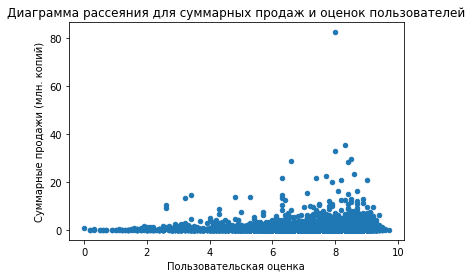

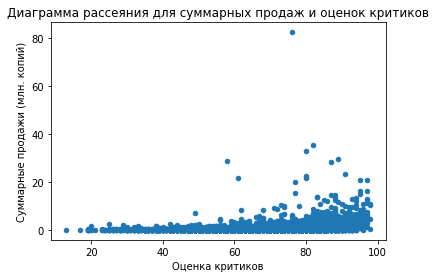

In [17]:
tmp = games.copy().query('user_score!="tbd"')
tmp['user_score'] = pd.to_numeric(tmp['user_score'])
#print(tmp.info())

tmp.plot(y='sum_sales', x='user_score', kind='scatter', ylabel='Суммарные продажи (млн. копий)', xlabel='Пользовательская оценка', title = 'Диаграмма рассеяния для суммарных продаж и оценок пользователей')
tmp.plot(y='sum_sales', x='critic_score', kind='scatter', ylabel='Суммарные продажи (млн. копий)', xlabel='Оценка критиков', title = 'Диаграмма рассеяния для суммарных продаж и оценок критиков')

tmp[['user_score', 'critic_score', 'sum_sales']].corr()

Получили, что корреляция продаж и оценок в целом слабая, но можно заметить, что среди игр с высокой оценкой чаще встречаются хиты.

Таким образом восстановить рейтинг игры по ее продажам невозможно.

В итоге оставим пропуски как есть, не будем их удалять или заполнять.

Как уже говорилось, в оценках пользователей содержится значение `tbd`, и его можно считать эквивалентным просто пропуску в данных.

Заменим значение `tbd` на `NaN`.

In [18]:
games = games.replace('tbd', np.nan)

#### Преобразование типов

Проведем преобразование типов данных.

Для описания года выхода и оценки критиков (по 100 балльной шкале) избыточно использовать тип `float`, приведем их к целому.

In [19]:
games['year_of_release'] = games['year_of_release'].astype('int')
games[games['critic_score'].notnull()]['critic_score'] = games[games['critic_score'].notnull()]['critic_score'].astype('int')

Значения в `user_score` имеют строковый тип. Переведем их в числовой и конвертируем для удобства в 100 балльную шкалу

In [20]:
games['user_score'] = games['user_score'].fillna(-1)

games['user_score'] = (pd.to_numeric(games['user_score'])*10).astype('int')

games['user_score'] = games['user_score'].replace(-10, np.nan)

In [21]:
display(games.head())
print('Размер таблицы после предобработки:', games.shape)
print(games.info())

print('Число пропусков')
print(games.isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


Размер таблицы после предобработки: (16443, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
Число пропусков
name                  0
platform              0
year_of_release       0
genre                 0
na_sales            

#### О причинах пропусков в данных

Пропуски в столбце `name` явно являются ошибочными (странно чтобы у игры не было названия), возможно они вызваны проблемами с кодировкой (например из-за иероглифов).

Пропуски в столбце `genre` тоже можно считать ошибками, возможно в первоисточнике просто не указан жанр, либо жанр не попадает в список жанров использованных при состалении таблицы.

Пропуске в годе выпуска могут быть вызваны как ошибами в данных, так и тем, что он просто неизвестен (например если игра старая)

Как уже отмечалось, пропуске в рейтинге ESRB скорее всего вызваны тем, что соответствующие игры не проходили оценку (она добровольная)

Пропуски в оценке пользователей и критиков вероятнее всего вызваны либо недоступностью оценок, либо их отсутствием (например игра не удостоилась никаким внимание или она новая и оценки еще не успели сделать)

#### Итоги предобработки данных

В итоге получаем предобработанный набор данных в которых остались пропуски в столбцах `user_score` и `critic_score`. Восстановить их не представляется возможным, значения `tbd` заменены на пропуски т.к. по сути им эквивалентны. 

Пропуски в столбце `rating` заполнены заглушкой `None`, т.к. рейтинг ESRB присвоен не всем играм. 

Проведено преобразование типов и, для удобства, отзывы критиков и пользователей приведены к единой шкале

Также данные очищены от всевозможных дубликатов.

### Исследовательский анализ данных

Опишем общую информацию об играх и игровых платформах

#### Число выпущенных игр в разные годы

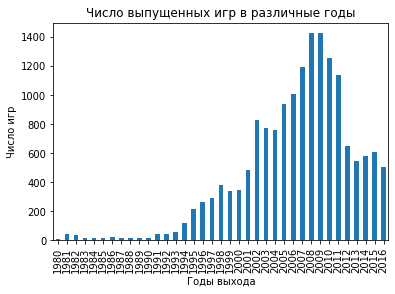

In [25]:
games['year_of_release'].value_counts().sort_index().plot(kind='bar', xlabel='Годы выхода', ylabel='Число игр', title='Число выпущенных игр в различные годы')
plt.show()

Получили, что больше всего игр в год выходило с 2001 по 2011 (примерно 1000 в год), начиная с 2012 наблюдается спад по выпуску игр (до 600 в год). Также отметим что в начале 90х рынок видеоигр стал появляться, а в 2000х произошел его стремительный рост.

#### Самые массовые платформы

Выберем 10 платформ с наибольшим числом продаж

10 самых массовых платформ:


,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


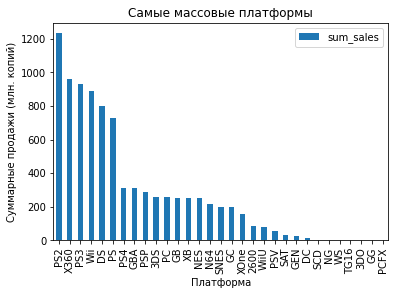

In [26]:
top_platforms = games.pivot_table(index='platform', values = 'sum_sales', aggfunc='sum').sort_values('sum_sales', ascending = False)

top_platforms.plot(kind='bar', xlabel='Платформа', ylabel='Суммарные продажи (млн. копий)', title='Самые массовые платформы')

top_10_platforms = top_platforms.head(10).index

print('10 самых массовых платформ:')
display(top_platforms.head(10))

#### Динамика продаж игр на 10 самых масовых платформах

Рассмотрим какие были суммарные продажи игр для 10 самых популярных консолей для различных годов выхода

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00


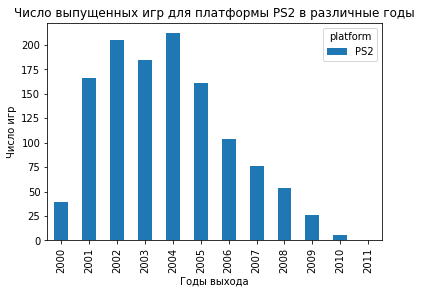

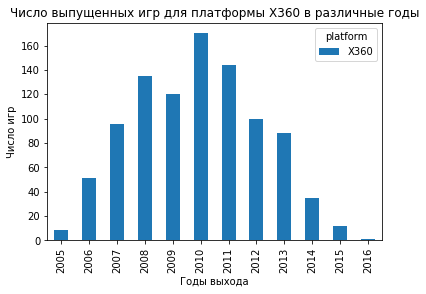

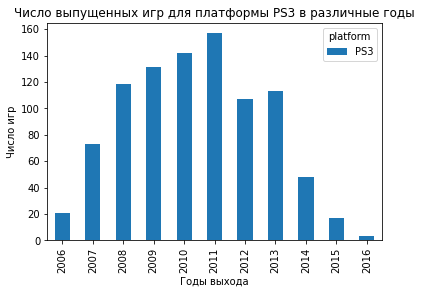

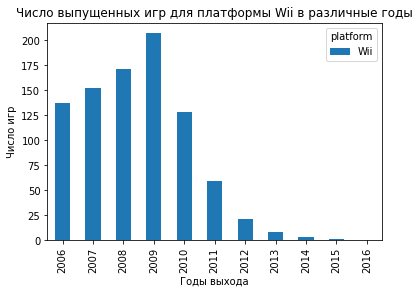

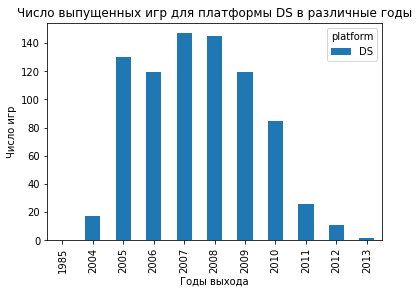

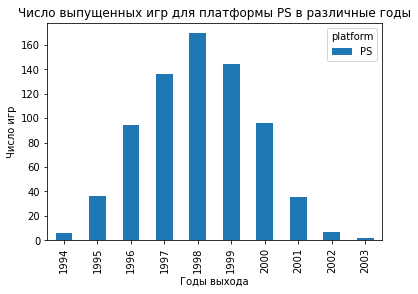

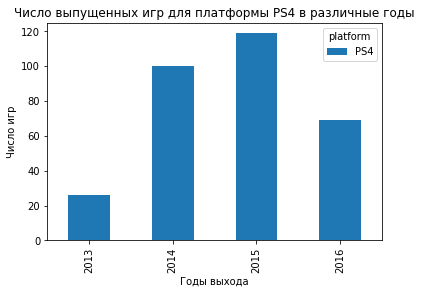

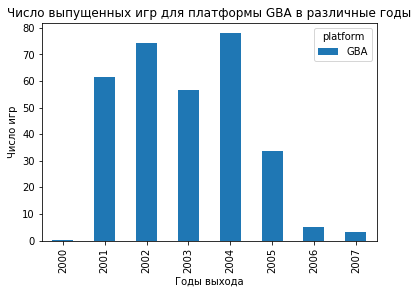

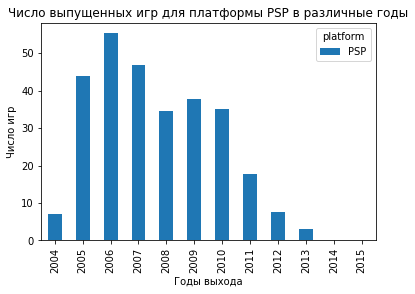

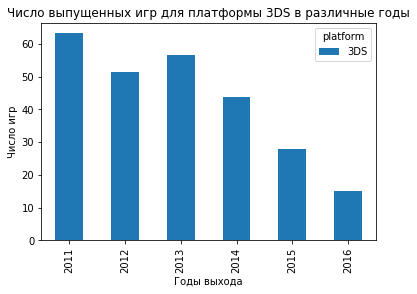

Медианная продолжительность (лет) выпуска игр для различных платформ (кроме ПК): 7.0


In [27]:
platform_stat = games.query('platform in @top_10_platforms').pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').fillna(0)
display(platform_stat)

platform_lifetime = []

for p in top_10_platforms:
    tmp = games.query('platform == @p').pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').fillna(0)
    tmp.plot(kind='bar', xlabel='Годы выхода', ylabel='Число игр', title='Число выпущенных игр для платформы '+ p+ ' в различные годы')
    plt.show()
    
    #if p != 'PC':
    #    platform_lifetime.append(tmp.notna().sum())
        
# Срок жизни оценивался не на глазок а как среднее число лет в которые были ненулевые продажи для разных платформ
# Исправил с учетом рекомендаций
        
time_life = games.query('platform != "PC"').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_lifetime.append(time_life['max'] - time_life['min'] + 1) # в срок жизни платформы, должны входить границы диапазона
    
#print('Средняя продолжительность (лет) выпуска игр для различных платформ (кроме ПК):', np.mean(platform_lifetime))
print('Медианная продолжительность (лет) выпуска игр для различных платформ (кроме ПК):', np.median(platform_lifetime))

#bplot = platform_stat.boxplot()

plt.show()

В среднем для каждой игровой платформы (кроме ПК) игры медианно выпускаются на протяжении 7 лет. ПК не были учтены т.к. это своего рода собирательная платформа (например разные версии ОС не всегда совместимы) игры для которой выпускаются почти все ремя ее существования.

Заметим также, что для каждой отдельной платформы в начале и в конце ее жизненного цикла выпускается меньше всего игр (но есть исключения: для некоторых приставок в начале продаж уже доступно много игр)

#### Актуальный период для прогноза на 2017

**Актуальным (для построния прогноза на 2017) перидом будем считать 2013-2016 годы.** Он не захватывает время падения рынка видеоигр 2012, и в 2013 уже почти не выпускаются игры на устаревшие консоли, но охватывается весь жизненный цикл актуальных (на то время) PS4 и Xbox One. 

В дальнейшем будем рассматривать только данные за этот актуальный период.

In [29]:
games_actual = games.query('year_of_release in [2013, 2014, 2015, 2016]')

display(games_actual.head())

print(games_actual.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB
None


За актуальный период вышло 2233 игры

#### Лидирующие платформы за актульный период

Здесь рассмотрим продажи игр для всех платформ (а не 10 самых популярых как до этого) за актулыный период

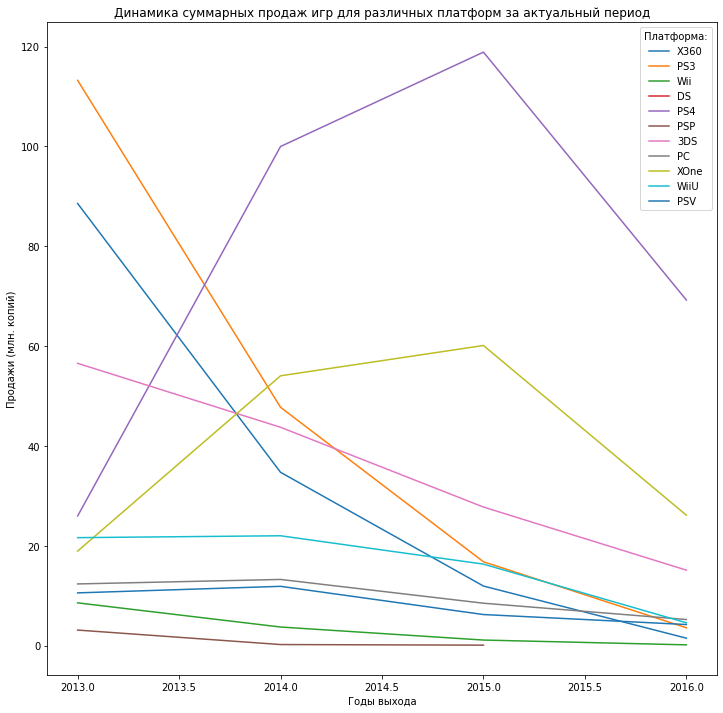

In [30]:
fig, ax = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(12)

#ax.set_xlabel='Годы выхода'
#ax.set_ylabel='Число игр'

for p in top_platforms.index:
    tmp = games_actual.query('platform == @p').pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').fillna(0)
    try:
        #display(tmp)
        tmp.plot(ax=ax)
    except:
        pass

ax.legend(title='Платформа:')
ax.set_xlabel('Годы выхода')
ax.set_ylabel('Продажи (млн. копий)')
ax.set_title('Динамика суммарных продаж игр для различных платформ за актуальный период')

plt.show()

Получили, что за последний год актуального периода (2016) произошел спад продаж новых игр для всех платформ. Но нужно учитывать, что данные за 2016 год могут быть неполными и, возможно, спада вовсе нет или он менее значительный.

Наибольшее внимание стоит обратить на для платформ PS4 и Xbox One, т.к. 
- игры для них все еще самые массовые
- за 14-15 годы число продаж игр для них имело положительный рост.

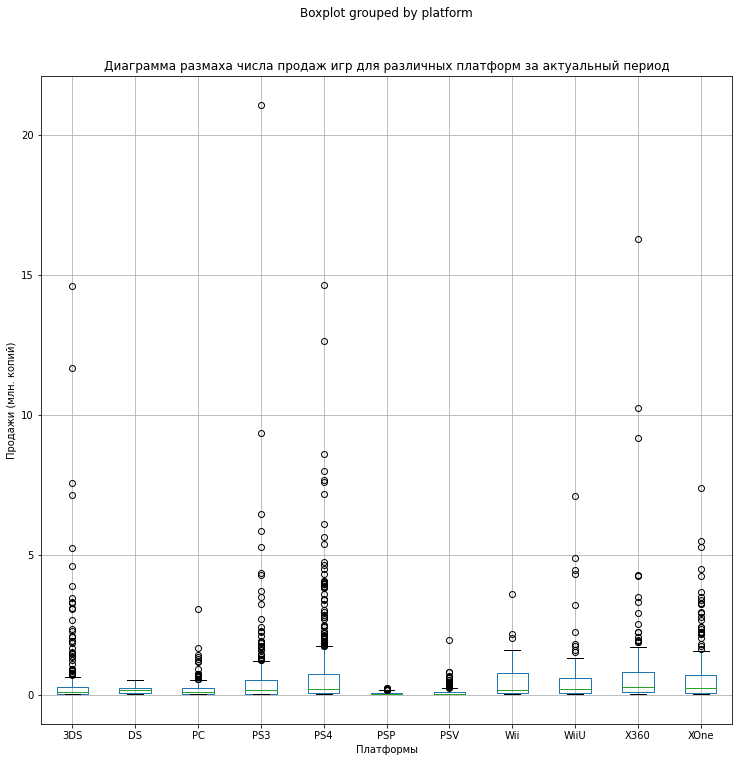

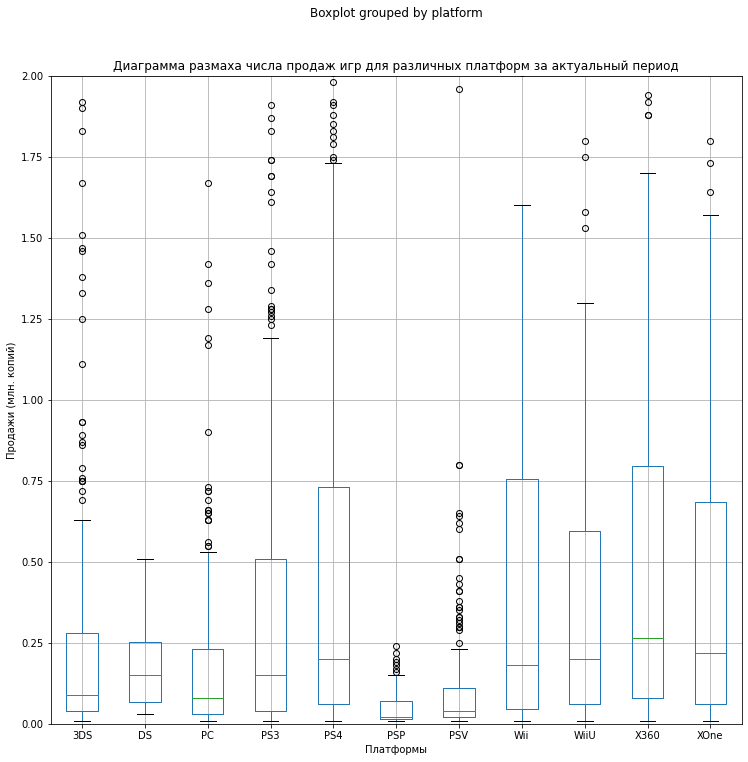

In [31]:
bxp = games_actual.boxplot(by='platform', column = 'sum_sales', figsize=(12,12))
plt.gca().set_ylabel('Продажи (млн. копий)')
plt.gca().set_xlabel('Платформы')
plt.gca().set_title('Диаграмма размаха числа продаж игр для различных платформ за актуальный период')
#bxp.set_xlabel='Платформы'
#bxp.set_ylabel='Продажи (млн. копий)'
plt.show()

bxp = games_actual.boxplot(by='platform', column = 'sum_sales', figsize=(12,12))
plt.gca().set_ylim((0,2))
plt.gca().set_ylabel('Продажи (млн. копий)')
plt.gca().set_xlabel('Платформы')
plt.gca().set_title('Диаграмма размаха числа продаж игр для различных платформ за актуальный период')
#bxp.set_xlabel='Платформы'
#bxp.set_ylabel='Продажи (млн. копий)'
plt.show()

#platform_stat_median = games_actual.pivot_table(index='platform', values='sum_sales', aggfunc='median').sort_values('sum_sales', ascending=False)
#platform_stat_median.plot(kind='bar', xlabel='Платформы', ylabel='Продажи (млн. копий)', title='Медианное число продаж для различных платформ')
#plt.show()

По диаграмме размаха можно заметить что для различных платформ медианное число продаж не слишком высокое, но есть некоторое число игр с очень высокими продажами.

Выскокие медианные продажи характерны для консолей Xbox, PS4, Wii(U). Они требуют особого внимания при планировании т.к. могут принести высокие прибыли

#### Связь отзывов и продаж

Сначала рассмотрим как отзывы пользователей и критиков влияют на продажи игр для платформы `PS4`

,user_score,critic_score,sum_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
sum_sales,-0.031957,0.406568,1.000000


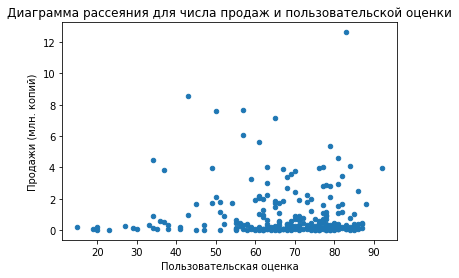

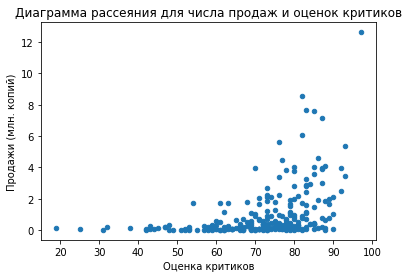

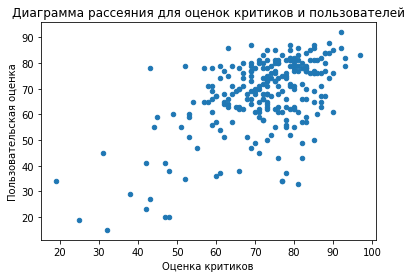

In [32]:
games_actual.query('platform=="PS4"').plot(x='user_score', y='sum_sales', kind='scatter', xlabel='Пользовательская оценка', ylabel='Продажи (млн. копий)', title = 'Диаграмма рассеяния для числа продаж и пользовательской оценки')

games_actual.query('platform=="PS4"').plot(x='critic_score', y='sum_sales', kind='scatter', xlabel='Оценка критиков', ylabel='Продажи (млн. копий)', title = 'Диаграмма рассеяния для числа продаж и оценок критиков')

games_actual.query('platform=="PS4"').plot(x='critic_score', y='user_score', kind='scatter', xlabel='Оценка критиков', ylabel='Пользовательская оценка', title = 'Диаграмма рассеяния для оценок критиков и пользователей')

games_actual.query('platform=="PS4"')[['user_score', 'critic_score', 'sum_sales']].corr()

Получили, что на примере PS4 есть прямая (но не очень сильная - коэффициент корреляции 0.4) корреляция между оценками критиков и числом продаж игр, корреляция между оценками пользователей и числом продаж практически отсутствует.

Если рассматривать диаграммы рассеяния, то можно заметить, что среди игр с высокой оценкой критиков чаще встречаются игры которые хорошо продаются, причем чем выше оценка тем больше могут быть суммарные продажи у таких удачных игр.

Заметим также, что среди игр, которые не слишком хорошо оценили пользователи (30-60 баллов) иногда (достаточно мало) встречаются игры с очень высокими продажами, но в остальном ситуация схожа с оценками критиков.

Таким образом можно заявить, что для игр с высокой оценкой критиков есть шанс стать успешными, причем продажи таких успешных игр тем выше, чем чем выше оценка критиков. С оценками пользователей ситуация аналогичная, но некоторые игры с низкой пользовательской оценкой также могут быть успешны.

Посмотрим те же диаграммы для нескольких других платформ.

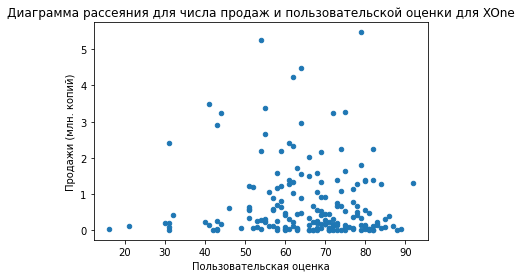

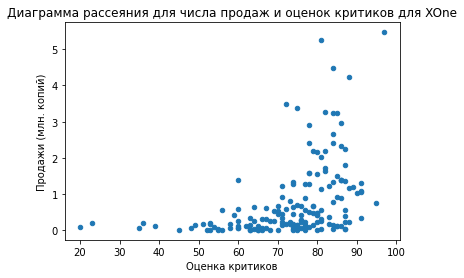

,user_score,critic_score,sum_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
sum_sales,-0.068925,0.416998,1.000000


###################################################################################


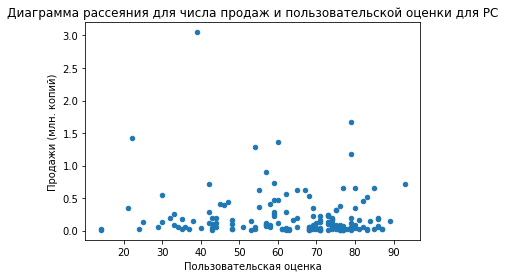

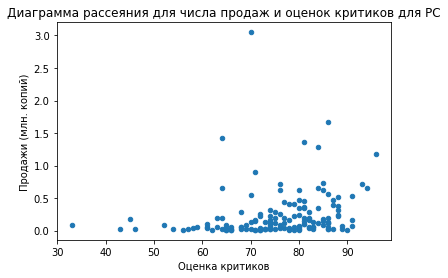

,user_score,critic_score,sum_sales
user_score,1.000000,0.429562,-0.093842
critic_score,0.429562,1.000000,0.196030
sum_sales,-0.093842,0.196030,1.000000


###################################################################################


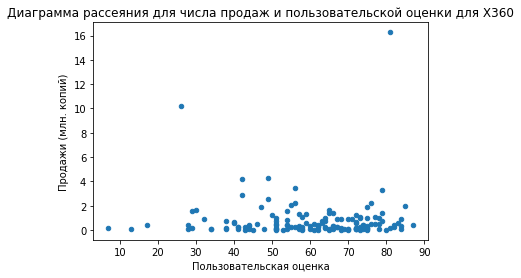

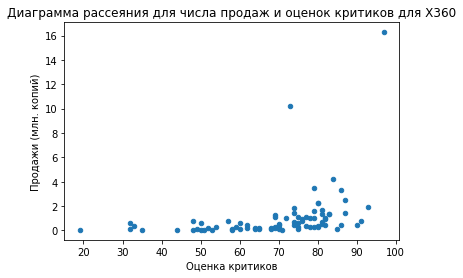

,user_score,critic_score,sum_sales
user_score,1.000000,0.520946,-0.011742
critic_score,0.520946,1.000000,0.350345
sum_sales,-0.011742,0.350345,1.000000


###################################################################################


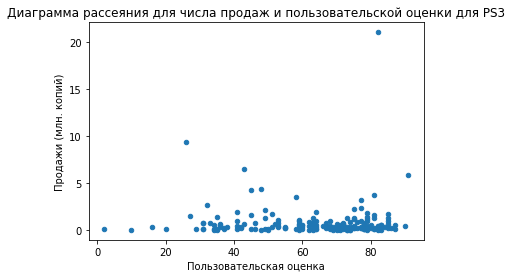

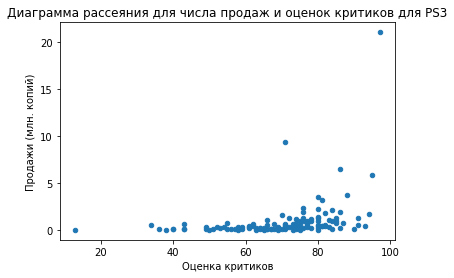

,user_score,critic_score,sum_sales
user_score,1.000000,0.599920,0.002394
critic_score,0.599920,1.000000,0.334285
sum_sales,0.002394,0.334285,1.000000


###################################################################################


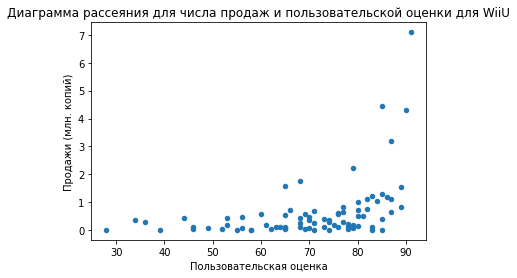

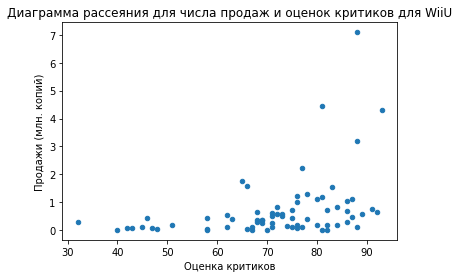

,user_score,critic_score,sum_sales
user_score,1.000000,0.721313,0.419330
critic_score,0.721313,1.000000,0.376415
sum_sales,0.419330,0.376415,1.000000


###################################################################################


In [33]:
plf = ['XOne', 'PC', 'X360', 'PS3', 'WiiU']

for p in plf:
    games_actual.query('platform==@p').plot(x='user_score', y='sum_sales', kind='scatter', xlabel='Пользовательская оценка', ylabel='Продажи (млн. копий)', title = 'Диаграмма рассеяния для числа продаж и пользовательской оценки для '+ p)
    games_actual.query('platform==@p').plot(x='critic_score', y='sum_sales', kind='scatter', xlabel='Оценка критиков', ylabel='Продажи (млн. копий)', title = 'Диаграмма рассеяния для числа продаж и оценок критиков для '+ p)
    plt.show()
    
    display(games_actual.query('platform==@p')[['user_score', 'critic_score', 'sum_sales']].corr())

    print('###################################################################################')

В целом для других платформ ситуация аналогичная. Корреляция оценок критиков и пользователей скачет от платформы, но является достаточно заметной. Корреляции между оценками и продажами все так же не наблюдается

#### Распределение игр по жанрам

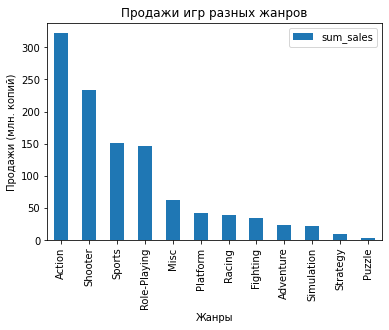

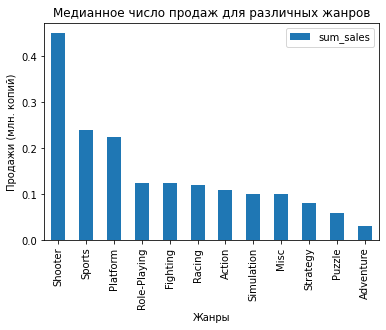

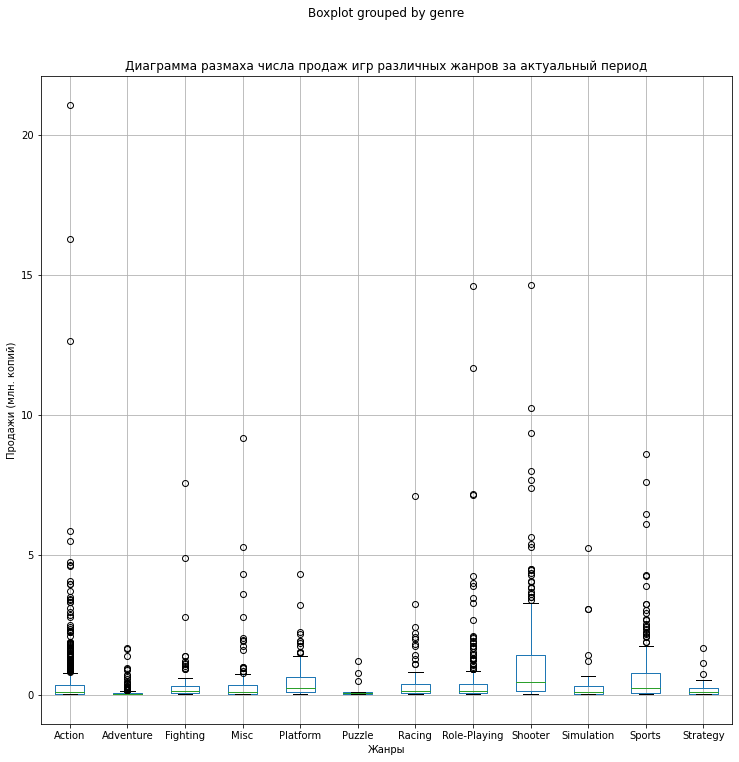

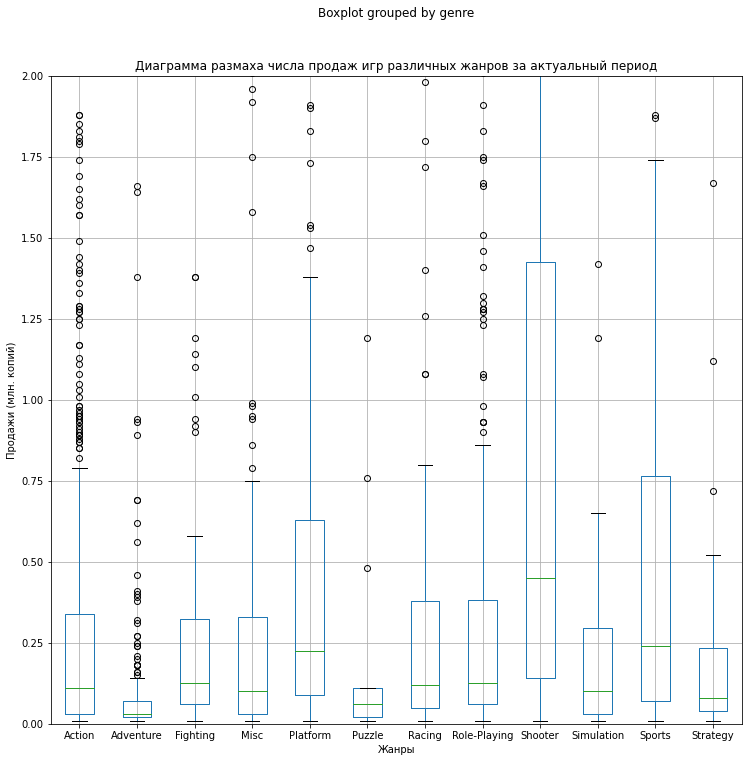

In [34]:
genre_stat = games_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)

genre_stat.plot(kind='bar', xlabel='Жанры', ylabel='Продажи (млн. копий)', title='Продажи игр разных жанров')
plt.show()

genre_stat_median = games_actual.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values('sum_sales', ascending=False)

genre_stat_median.plot(kind='bar', xlabel='Жанры', ylabel='Продажи (млн. копий)', title='Медианное число продаж для различных жанров')
plt.show()

bxp = games_actual.boxplot(by='genre', column = 'sum_sales', figsize=(12,12))
#plt.gca().set_ylim((0,5))
plt.gca().set_ylabel('Продажи (млн. копий)')
plt.gca().set_xlabel('Жанры')
plt.gca().set_title('Диаграмма размаха числа продаж игр различных жанров за актуальный период')
#bxp.set_xlabel='Платформы'
#bxp.set_ylabel='Продажи (млн. копий)'
plt.show()

bxp = games_actual.boxplot(by='genre', column = 'sum_sales', figsize=(12,12))
plt.gca().set_ylim((0,2))
plt.gca().set_ylabel('Продажи (млн. копий)')
plt.gca().set_xlabel('Жанры')
plt.gca().set_title('Диаграмма размаха числа продаж игр различных жанров за актуальный период')
#bxp.set_xlabel='Платформы'
#bxp.set_ylabel='Продажи (млн. копий)'
plt.show()

Получаем что наиболее стабильными по продажам (высоко медианное число продаж игр в данном жанре) являются шутеры, спортивные, платформеры, РПГ и файтинги. 

По диаграмме размаха видно, что в каждом жанре есть некоторое количестов игр, продажи которых в несколько раз превышают медианные продажи по соответствующим жанрам.

Самыми популярными по суммарным продажам оказались жанры экшн, шутеры, спортивные игры и РПГ, а наименее популярны пазлы, стратегии, приключения и симуляторы. Наверное это и не удивительно, т.к. последние являются несколько специфическими жанрами.

### Портрет среднестатистического пользователя каждого из регионов

Рассмотрим топ 5 самых популярных платформ и жанров для каждого из регионов, также посмотрим как рейтинг ESRB влияет на продажи в каждом регионе

#### Северная Америка

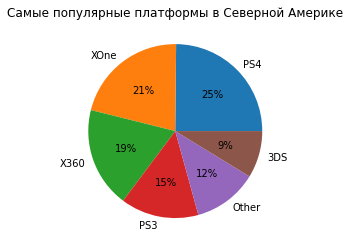

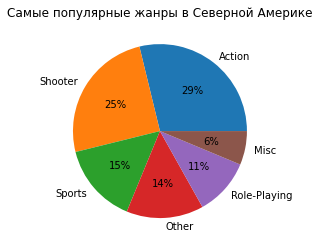

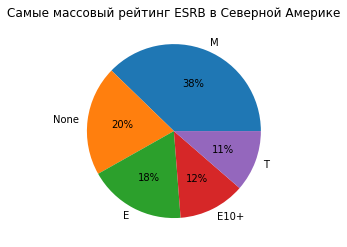

In [35]:
tmp = games_actual.copy()

platform_na = tmp.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
tmp['platform'] = tmp['platform'].where(tmp['platform'].isin(platform_na.head(5).index), 'Other')
platform_na = tmp.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
#display(platform_na)
platform_na.plot(y='na_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные платформы в Северной Америке')
plt.show()

genre_na = tmp.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
tmp['genre'] = tmp['genre'].where(tmp['genre'].isin(genre_na.head(5).index), 'Other')
genre_na = tmp.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
#display(genre_na)
genre_na.plot(y='na_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные жанры в Северной Америке')
plt.show()

rating_na = tmp.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
#display(rating_na)
rating_na.plot(y='na_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые массовый рейтинг ESRB в Северной Америке')
plt.show()

Получаем, что статистический североамериканский пользователь имеет актуальную или более старую консоль Playstation или Xbox, реже 3DS и прочие.

Предпочитает экшн-игры, шутеры, спортивные, РПГ и смешанного жанра.

Наиболее часто играет в игры рейтинга `M` (для взрослых), дальше в игры без рейтинга ESRB (20%), реже в игры для всех возрастов (`E`) и еше реже в игры для подростков (`T`, `E10+`).

#### Европа

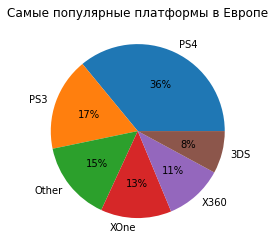

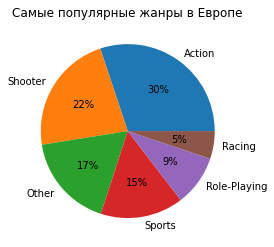

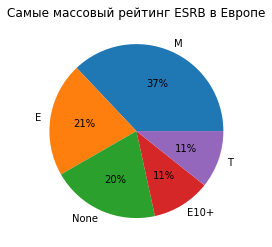

In [36]:
tmp = games_actual.copy()

platform_eu = tmp.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
tmp['platform'] = tmp['platform'].where(tmp['platform'].isin(platform_eu.head(5).index), 'Other')
platform_eu = tmp.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
#display(platform_eu)
platform_eu.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные платформы в Европе')
plt.show()

genre_eu = tmp.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
tmp['genre'] = tmp['genre'].where(tmp['genre'].isin(genre_eu.head(5).index), 'Other')
genre_eu = tmp.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
#display(genre_eu)
genre_eu.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные жанры в Европе')
plt.show()

rating_eu = tmp.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
#display(rating_eu)
rating_eu.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые массовый рейтинг ESRB в Европе')
plt.show()

Европейские пользователи также предпочитаю актуальную или более старую консоль Playstation или Xbox, но также встречаются и 3DS. Доля прочих платформ около 15%.

Наиболее популярны экшн-игры, шутеры, спортивные, РПГ и гонки.

Наиболее часто играют в игры рейтинга `M` и `E`, около 20% занимают игры без рейтинга ESRB.

#### Япония


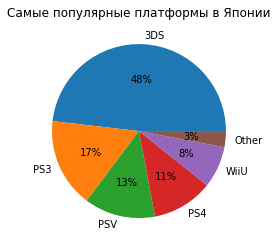

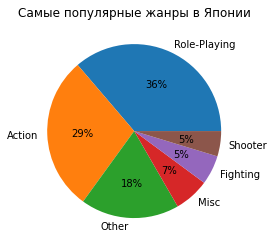

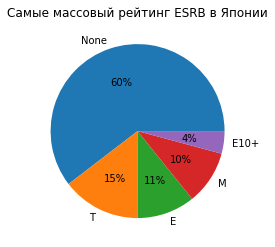

In [37]:
tmp = games_actual.copy()

platform_jp = tmp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
tmp['platform'] = tmp['platform'].where(tmp['platform'].isin(platform_jp.head(5).index), 'Other')
platform_jp = tmp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
#display(platform_jp)
platform_jp.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные платформы в Японии')
plt.show()

genre_jp = tmp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
tmp['genre'] = tmp['genre'].where(tmp['genre'].isin(genre_jp.head(5).index), 'Other')
genre_jp = tmp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
#display(genre_jp)
genre_jp.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные жанры в Японии')
plt.show()

rating_jp = tmp.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
#display(rating_jp)
rating_jp.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые массовый рейтинг ESRB в Японии')
plt.show()

Японцы предпочитают 3DS (48%), консоли PlayStation (суммарно около 30%), WiiU и менее 3% остальных

Чаще всего покупают РПГ, экшн-игры, игры смешанного жанра, файтинги и шутеры и еще 18% составлют прочие жанры

Более половины (60%) игр в Японии не имеют оценки ESRB, а среди тех что имеют наиболее популярны оценки `T` и `E`

#### Другие регионы

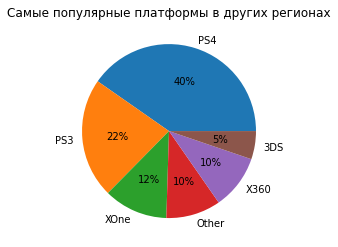

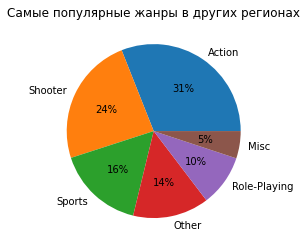

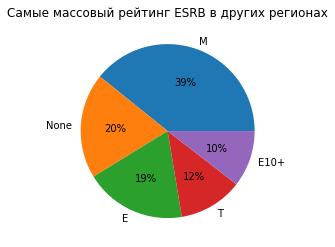

In [38]:
tmp = games_actual.copy()

platform_other = tmp.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
tmp['platform'] = tmp['platform'].where(tmp['platform'].isin(platform_other.head(5).index), 'Other')
platform_other = tmp.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
#display(platform_other)
platform_other.plot(y='other_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные платформы в других регионах')
plt.show()

genre_other = tmp.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
tmp['genre'] = tmp['genre'].where(tmp['genre'].isin(genre_other.head(5).index), 'Other')
genre_other = tmp.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
#display(genre_other)
genre_other.plot(y='other_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые популярные жанры в других регионах')
plt.show()

rating_other = tmp.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
#display(rating_other)
rating_other.plot(y='other_sales', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Самые массовый рейтинг ESRB в других регионах')
plt.show()

Вкусы игроков в других регионов совпадают с американцами в выборе консоли, жанре и рейтинге.

Также можно сказать что почти везде (кроме Японии) в ходу консоли Playstation и Xbox, экшн-игры, шутеры, спортивные и РПГ и рейтинги `M` и `E`

Среди японцев популярностью пользуется 3DS и многие популярные там игры не имеют рейтинга ESRB.

Во всех регионах кроме Японии доля игр без оценки ESRB составляет около 20%

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем следущие нулевую и альтернативную гипотезы:

H_0: средний пользовательский рейтинг игр на Xbox One  = средний пользовательский рейтинг игр на ПК

H_1: средний пользовательский рейтинг игр на Xbox One != средний пользовательский рейтинг игр на ПК

Т.к спрашивается именно равенство рейтингов, будем проверять двустороннюю гипотезу

Будем проверять равенства средних 2 генеральных совокупостей, с предположением о неравенстве дисперсий (размеры выборок не равны) при двусторонней гипотезе

Статичическую зачимость установим на уровне 5% (его достаточно в большинстве случаев).

p-значение: 0.1401265840361173
Не получилось отвергнуть нулевую гипотезу


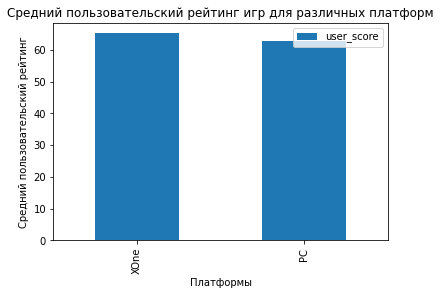

In [39]:
results = st.ttest_ind(games_actual.query('platform=="XOne"')['user_score'].dropna(), games_actual.query('platform=="PC"')['user_score'].dropna())

alpha = 0.05 # уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
platform_user_score_mean = games_actual.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score', aggfunc='mean').sort_values('user_score', ascending=False)
platform_user_score_mean.plot(kind='bar', xlabel='Платформы', ylabel='Средний пользовательский рейтинг', title='Средний пользовательский рейтинг игр для различных платформ')
plt.show()

Нулевую гипотезу отвергнуть не получилось, значит вполне возможно что средние пользовательские оценки совпадают для игр на ПК и Xbox One

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем следущие нулевую и альтернативную гипотезы:

H_0: средний пользовательский рейтинг игр жанра Acition   = средний пользовательский рейтинг игр жанра Sports

H_1: средний пользовательский рейтинг игр жанра Acition  != средний пользовательский рейтинг игр жанра Sports

Нулевая гипотеза сформулирована так чтобы содержать именно равенство. Т.к спрашивается именно неравенство рейтингов, будем проверять двустороннюю гипотезу

Будем проверять равенства средних 2 генеральных совокупостей, с предположением о неравенстве дисперсий (размеры выборок не равны) при двусторонней гипотезе

Статичическую зачимость установим на уровне 5% (его достаточно в большинстве случаев).

p-значение: 1.0517832389140778e-27
Отвергаем нулевую гипотезу


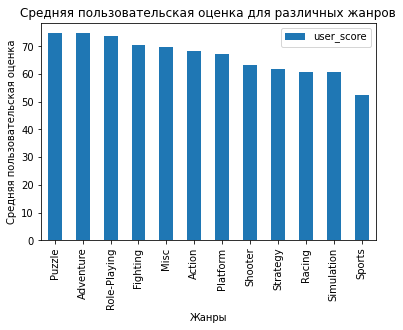

In [40]:
results = st.ttest_ind(games_actual.query('genre=="Action"')['user_score'].dropna(), games_actual.query('genre=="Sports"')['user_score'].dropna())

alpha = 0.05 # уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
genre_user_score_mean = games_actual.pivot_table(index='genre', values='user_score', aggfunc='mean').sort_values('user_score', ascending=False)
genre_user_score_mean.plot(kind='bar', xlabel='Жанры', ylabel='Средняя пользовательская оценка', title='Средняя пользовательская оценка для различных жанров')
plt.show()

Т.к. полученные p-значение очень мало, можно сказать, что с большой вероятностью пользовательские оценки в жанре Action действительно не совпадают с оценками в жанре Sports

## Выводы

В ходе работы были обработаны данные о продажах видеоигр в различных регионов. После предобработки в данных осталось множество пропусков в оценках пользователей и критиков которые не получается восстановить

Получено, что средний срок выпуска игр на игровую консоль 7 лет.

В исследовании рассматривался актуальный период, определенный как 2013-2016 годы

При оценке возможной популярности игры следует опираться на оценки критиков, у игр с хорошей оценкой выше шанс стать массовыми.

Также для этого подходят и пользовательские оценки, но стоит учитывать, что даже плохо оцененая игра может стать популярной.

Из рассмотрения продаж игр для различных консолей за актуальный период, получено, что в 2017 году самыми перспективными для продаж останутся игры для PS4 и Xbox One. Эти же консоли находятся в тройке лидеров для каждого региона по отдльности (кроме Японии, где все еще популярна 3DS)

Как среди мировых продаж так и для всех регионов по отдельности самыми массовыми являются игры в жанрах экшн, шутеры, спортивные и РПГ. 

Однако наиболее стабильными (в среднем любая игра в этом жанре достаточно успешна) являются шутеры, спортивные, РПГ и платформеры. 
Стоит обратить внимание именно на эти жанры при планировании на 2017

Также наибольшее внимание стоит обращать внимание на игры с рейтингом ESRB `M` и `E`. Однако игры без данного рейтинга также хорошо продаются (около 20% от всех продаж). Особенно это заметно в Японии, где игры без рейтинга ESRB занимают 60% рынка.

Не удалось отвегрнуть гипотезу о том, что средние пользовательские оценки совпадают для игр на ПК и Xbox One

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные вероятнее всего верна.

К сожалению, в данных отсутствуют данные о разработчиках игр. Подобные данные позволили бы определить разработчиков с самым высоким процентов успешных игр, на любые игры которого стоит обращать большое внимание (как пример Rockstar)

Таким образом можно сформулировать следующие рекомендации на 2017 год.

Во всех регионах кроме Японии аиболее популярны должны быть игры:
- для PS4 или Xbox One
- в жанре шутер, спорт, РПГ или платформер
- рейтинг ESRB `M` или `E` или без него
- если оценка доступна, то с высоким рейтингом критиков

Для японского рынка стоит обратить внимание на игры для 3DS и PlayStation в жанрах экшн или РПГ без рейтинга ESRB